In [1]:
%load_ext lab_black

In [2]:
import scanpy as sc
import scipy as sp
import numpy as np
import pandas as pd

pd.options.display.max_columns = None

sc.settings.set_figure_params(dpi=80)
sc.settings.verbosity = 3

In [3]:
adata = sc.read_h5ad(
    "../snRNA/from_rico/integrated_snrnaseq/integrated_rnasamples_ann.h5ad"
)
adata

AnnData object with n_obs × n_vars = 191795 × 29126
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'doublet_score', 'doublet', 'dissociation_s1', 'opt_clust', 'patient', 'batch', 'opt_clust_integrated', 'cell_type', 'ident'
    obsm: 'HARMONY', 'PCA', 'UMAP_HARMONY'
    layers: 'logcounts'

In [4]:
adata.raw = adata.copy()
adata.X = adata.layers["logcounts"].copy()

In [5]:
del adata.layers["logcounts"]

In [6]:
# obsm (Embeddings)
adata.obsm["X_umap"] = adata.obsm["UMAP_HARMONY"].copy()
adata.obsm["X_pca"] = adata.obsm["PCA"].copy()
adata.obsm["X_harmony"] = adata.obsm["HARMONY"].copy()

del adata.obsm["UMAP_HARMONY"]
del adata.obsm["PCA"]
del adata.obsm["HARMONY"]

In [7]:
adata.obs.rename(
    {
        "cell_type": "cell_type_original",
        "nCount_RNA": "n_counts",
        "nFeature_RNA": "n_genes",
        "percent_mt": "percent_mito",
        "ident": "final_cluster",
        "orig_ident": "sample",
        "batch": "seq_batch",
        "dissociation_s1": "dissociation_score",
    },
    axis="columns",
    inplace=True,
)

adata.obs.drop(columns=["doublet", "opt_clust", "opt_clust_integrated"], inplace=True)

In [8]:
adata.obs["cell_type_original"].replace(
    {
        "Adipo": "Adipocyte",
        "CM": "Cardiomyocyte",
        "Endo": "Endothelial",
        "Fib": "Fibroblast",
        "PC": "Pericyte",
        "prolif": "Prolif",
    },
    inplace=True,
)

... storing 'cell_type_original' as categorical


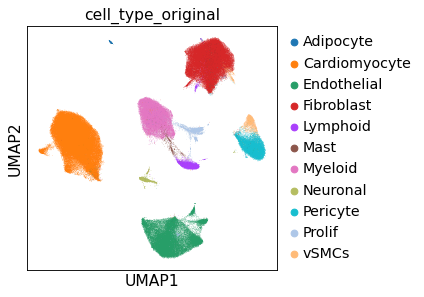

In [9]:
sc.pl.umap(adata, color="cell_type_original")

In [10]:
## update patient ID
adata.obs["patient"] = adata.obs["sample"]
adata.obs["patient"].replace(
    {
        "CK158": "P1",
        "CK162": "P4",
        "CK165": "P2",
        "CK163": "P2",
        "CK161": "P3",
        "CK160": "P3",
        "CK164": "P3",
        "CK159": "P5",
        "CK374": "P17",
        "CK356": "P6",
        "CK357": "P7",
        "CK358": "P8",
        "CK359": "P2",
        "CK360": "P9",
        "CK361": "P10",
        "CK362": "P11",
        "CK363": "P9",
        "CK375": "P9",
        "CK364": "P12",
        "CK365": "P13",
        "CK366": "P14",
        "CK367": "P18",
        "CK368": "P19",
        "CK369": "P16",
        "CK376": "P16",
        "CK370": "P20",
        "CK371": "P15",
        "CK372": "P9",
        "CK373": "P15",
    },
    inplace=True,
)

In [11]:
## update region ID
adata.obs["region"] = adata.obs["sample"]
adata.obs["region"].replace(
    {
        "CK158": "control",
        "CK162": "FZ/GT",
        "CK165": "IZ/BZ",
        "CK163": "RZ/BZ",
        "CK161": "IZ",
        "CK160": "RZ/BZ",
        "CK164": "RZ",
        "CK159": "RZ/FZ",
        "CK374": "control",
        "CK356": "RZ",
        "CK357": "control",
        "CK358": "control",
        "CK359": "RZ/GT",
        "CK360": "RZ",
        "CK361": "IZ",
        "CK362": "RZ",
        "CK363": "GT/IZ",
        "CK375": "GT/IZ",
        "CK364": "RZ/BZ",
        "CK365": "GT/IZ",
        "CK366": "FZ",
        "CK367": "FZ",
        "CK368": "FZ/GT",
        "CK369": "IZ",
        "CK376": "IZ",
        "CK370": "FZ",
        "CK371": "GT/IZ",
        "CK372": "GT/IZ",
        "CK373": "IZ",
    },
    inplace=True,
)

In [12]:
## update patient_region ID
adata.obs["patient_region"] = adata.obs["sample"]
adata.obs["patient_region"].replace(
    {
        "CK158": "control_P1",
        "CK162": "FZ/GT_P4",
        "CK165": "IZ/BZ_P2",
        "CK163": "RZ/BZ_P2",
        "CK161": "IZ_P3",
        "CK160": "RZ/BZ_P3",
        "CK164": "RZ_P3",
        "CK159": "RZ/FZ_P5",
        "CK374": "control_P17",
        "CK356": "RZ_P6",
        "CK357": "control_P7",
        "CK358": "control_P8",
        "CK359": "RZ/GT_P2",
        "CK360": "RZ_P9",
        "CK361": "IZ_P10",
        "CK362": "RZ_P11",
        "CK363": "GT/IZ_P9",
        "CK375": "GT/IZ_P9",
        "CK364": "RZ/BZ_P12",
        "CK365": "GT/IZ_P13",
        "CK366": "FZ_P14",
        "CK367": "FZ_P18",
        "CK368": "FZ/GT_P19",
        "CK369": "IZ_P16",
        "CK376": "IZ_P16",
        "CK370": "FZ_P20",
        "CK371": "GT/IZ_P15",
        "CK372": "GT/IZ_P9_rep2",
        "CK373": "IZ_P15",
    },
    inplace=True,
)

In [13]:
## update group ID
adata.obs["group"] = adata.obs["sample"]
adata.obs["group"].replace(
    {
        "CK158": "group_1",
        "CK162": "group_3",
        "CK165": "group_2",
        "CK163": "group_1",
        "CK161": "group_2",
        "CK160": "group_1",
        "CK164": "group_1",
        "CK159": "group_1",
        "CK374": "group_1",
        "CK356": "group_1",
        "CK357": "group_1",
        "CK358": "group_1",
        "CK359": "group_1",
        "CK360": "group_1",
        "CK361": "group_2",
        "CK362": "group_1",
        "CK363": "group_2",
        "CK375": "group_2",
        "CK364": "group_1",
        "CK365": "group_2",
        "CK366": "group_3",
        "CK367": "group_3",
        "CK368": "group_3",
        "CK369": "group_2",
        "CK376": "group_2",
        "CK370": "group_3",
        "CK371": "group_2",
        "CK372": "group_2",
        "CK373": "group_2",
    },
    inplace=True,
)

In [14]:
## cell metadata
# https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/2.0.0/schema.md#obs-cell-metadata

# assay_ontology_term_id
adata.obs["assay_ontology_term_id"] = "EFO:0009922"

In [15]:
# cell_type_ontology_term_id
adata.obs["cell_type_ontology_term_id"] = adata.obs["cell_type_original"]
adata.obs["cell_type_ontology_term_id"].replace(
    {
        "Adipocyte": "CL:1000311",
        "Cardiomyocyte": "CL:0000513",
        "Endothelial": "CL:0010008",
        "Fibroblast": "CL:0002548",
        "Lymphoid": "CL:0000838",
        "Myeloid": "CL:0001082",
        "Mast": "CL:0000097",
        "Neuronal": "CL:0000006",
        "Pericyte": "CL:0000669",
        "prolif": "CL:0000003",
        "vSMCs": "CL:0000514",
    },
    inplace=True,
)

In [16]:
# development_stage_ontology_term_id
adata.obs["development_stage_ontology_term_id"] = adata.obs["sample"]
adata.obs["development_stage_ontology_term_id"].replace(
    {
        "CK158": "HsapDv:0000138",
        "CK162": "HsapDv:0000168",
        "CK165": "HsapDv:0000138",
        "CK163": "HsapDv:0000138",
        "CK161": "HsapDv:0000151",
        "CK160": "HsapDv:0000151",
        "CK164": "HsapDv:0000151",
        "CK159": "HsapDv:0000157",
        "CK374": "HsapDv:0000155",
        "CK356": "HsapDv:0000141",
        "CK357": "HsapDv:0000149",
        "CK358": "HsapDv:0000138",
        "CK359": "HsapDv:0000138",
        "CK360": "HsapDv:0000146",
        "CK361": "HsapDv:0000132",
        "CK362": "HsapDv:0000154",
        "CK363": "HsapDv:0000146",
        "CK375": "HsapDv:0000146",
        "CK364": "HsapDv:0000134",
        "CK365": "HsapDv:0000145",
        "CK366": "HsapDv:0000153",
        "CK367": "HsapDv:0000158",
        "CK368": "HsapDv:0000152",
        "CK369": "HsapDv:0000160",
        "CK376": "HsapDv:0000160",
        "CK370": "HsapDv:0000157",
        "CK371": "HsapDv:0000137",
        "CK372": "HsapDv:0000146",
        "CK373": "HsapDv:0000137",
    },
    inplace=True,
)

In [17]:
# disease_ontology_term_id
adata.obs["disease_ontology_term_id"] = adata.obs["sample"]
adata.obs["disease_ontology_term_id"].replace(
    {
        "CK158": "PATO:0000461",
        "CK162": "MONDO:0005068",
        "CK165": "MONDO:0005068",
        "CK163": "MONDO:0005068",
        "CK161": "MONDO:0005068",
        "CK160": "MONDO:0005068",
        "CK164": "MONDO:0005068",
        "CK159": "MONDO:0005068",
        "CK374": "PATO:0000461",
        "CK356": "MONDO:0005068",
        "CK357": "PATO:0000461",
        "CK358": "PATO:0000461",
        "CK359": "MONDO:0005068",
        "CK360": "MONDO:0005068",
        "CK361": "MONDO:0005068",
        "CK362": "MONDO:0005068",
        "CK363": "MONDO:0005068",
        "CK375": "MONDO:0005068",
        "CK364": "MONDO:0005068",
        "CK365": "MONDO:0005068",
        "CK366": "MONDO:0005068",
        "CK367": "MONDO:0005068",
        "CK368": "MONDO:0005068",
        "CK369": "MONDO:0005068",
        "CK376": "MONDO:0005068",
        "CK370": "MONDO:0005068",
        "CK371": "MONDO:0005068",
        "CK372": "MONDO:0005068",
        "CK373": "MONDO:0005068",
    },
    inplace=True,
)

In [18]:
# ethnicity_ontology_term_id
# assume all patients from Europe
# https://www.ebi.ac.uk/ols/ontologies/hancestro/terms?iri=http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FHANCESTRO_0031&viewMode=All&siblings=false
adata.obs["ethnicity_ontology_term_id"] = "HANCESTRO:0005"

In [19]:
# is_primary_data
adata.obs["is_primary_data"] = True

In [20]:
# organism_ontology_term_id
adata.obs["organism_ontology_term_id"] = "NCBITaxon:9606"

In [21]:
# sex_ontology_term_id
# PATO:0000383 -> male
# PATO:0000384 -> female
adata.obs["sex_ontology_term_id"] = adata.obs["sample"]
adata.obs["sex_ontology_term_id"].replace(
    {
        "CK158": "PATO:0000383",
        "CK162": "PATO:0000383",
        "CK165": "PATO:0000383",
        "CK163": "PATO:0000383",
        "CK161": "PATO:0000383",
        "CK160": "PATO:0000383",
        "CK164": "PATO:0000383",
        "CK159": "PATO:0000383",
        "CK374": "PATO:0000383",
        "CK356": "PATO:0000383",
        "CK357": "PATO:0000384",
        "CK358": "PATO:0000383",
        "CK359": "PATO:0000383",
        "CK360": "PATO:0000384",
        "CK361": "PATO:0000383",
        "CK362": "PATO:0000384",
        "CK363": "PATO:0000384",
        "CK375": "PATO:0000384",
        "CK364": "PATO:0000383",
        "CK365": "PATO:0000383",
        "CK366": "PATO:0000383",
        "CK367": "PATO:0000384",
        "CK368": "PATO:0000383",
        "CK369": "PATO:0000383",
        "CK376": "PATO:0000383",
        "CK370": "PATO:0000383",
        "CK371": "PATO:0000384",
        "CK372": "PATO:0000384",
        "CK373": "PATO:0000384",
    },
    inplace=True,
)

In [22]:
# tissue_ontology_term_id
adata.obs["tissue_ontology_term_id"] = "UBERON:0002084"

In [23]:
adata.obs

,sample,n_counts,n_genes,percent_mito,doublet_score,dissociation_score,patient,seq_batch,cell_type_original,final_cluster,region,patient_region,group,assay_ontology_term_id,cell_type_ontology_term_id,development_stage_ontology_term_id,disease_ontology_term_id,ethnicity_ontology_term_id,is_primary_data,organism_ontology_term_id,sex_ontology_term_id,tissue_ontology_term_id
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,2598.0,1678,0.115473,0.000324,0.137064,P1,A,Fibroblast,2,control,control_P1,group_1,EFO:0009922,CL:0002548,HsapDv:0000138,PATO:0000461,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,13003.0,4187,0.053834,0.003417,-0.006482,P1,A,Cardiomyocyte,0,control,control_P1,group_1,EFO:0009922,CL:0000513,HsapDv:0000138,PATO:0000461,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,6365.0,2700,0.047133,0.032239,0.005020,P1,A,Cardiomyocyte,3,control,control_P1,group_1,EFO:0009922,CL:0000513,HsapDv:0000138,PATO:0000461,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,627.0,519,0.000000,0.000365,0.087506,P1,A,Fibroblast,2,control,control_P1,group_1,EFO:0009922,CL:0002548,HsapDv:0000138,PATO:0000461,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,4488.0,1999,0.155971,0.004785,-0.001798,P1,A,Cardiomyocyte,3,control,control_P1,group_1,EFO:0009922,CL:0000513,HsapDv:0000138,PATO:0000461,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCATGGTCTTGCTC-1,CK376,1153.0,940,0.000000,0.521381,0.066911,P16,B,Fibroblast,19,IZ,IZ_P16,group_2,EFO:0009922,CL:0002548,HsapDv:0000160,MONDO:0005068,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
TTTCCTCAGGTTCATC-1,CK376,657.0,570,0.456621,0.006264,0.019443,P16,B,Lymphoid,11,IZ,IZ_P16,group_2,EFO:0009922,CL:0000838,HsapDv:0000160,MONDO:0005068,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
TTTCGATTCCGGTAAT-1,CK376,808.0,673,0.000000,0.001830,0.104566,P16,B,Myeloid,4,IZ,IZ_P16,group_2,EFO:0009922,CL:0001082,HsapDv:0000160,MONDO:0005068,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
TTTGACTTCGCCAACG-1,CK376,862.0,717,0.232019,0.013721,0.024106,P16,B,Endothelial,5,IZ,IZ_P16,group_2,EFO:0009922,CL:0010008,HsapDv:0000160,MONDO:0005068,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084


In [24]:
# update Gene Metadata
# feature_biotype
adata.var["feature_biotype"] = "gene"

# feature_id
# adata.var["feature_id"] = "gene"

# feature_is_filtered
adata.var["feature_is_filtered"] = False

In [25]:
adata.var

,feature_biotype,feature_is_filtered
AL627309.1,gene,False
AL627309.5,gene,False
AL627309.4,gene,False
AL669831.2,gene,False
LINC01409,gene,False
...,...,...
AL035661.2,gene,False
AP001062.2,gene,False
PNMA6F,gene,False
LYPD8,gene,False


In [26]:
adata.raw.var["feature_biotype"] = "gene"
adata.raw.var

,feature_biotype
AL627309.1,gene
AL627309.5,gene
AL627309.4,gene
AL669831.2,gene
LINC01409,gene
...,...
AL035661.2,gene
AP001062.2,gene
PNMA6F,gene
LYPD8,gene


In [27]:
# Dataset Metadata

# schema_version
adata.uns["schema_version"] = "2.0.0"

# title
adata.uns["title"] = "All-snRNA-Spatial multi-omic map of human myocardial infarction"

# X_normalization
adata.uns["X_normalization"] = "LogNormalization"

# batch_condition
adata.uns["batch_condition"] = ["sample"]

# default_embedding
adata.uns["default_embedding"] = "X_umap"

# X_approximate_distribution
adata.uns["X_approximate_distribution"] = "normal"

In [28]:
adata.write("./snRNA-seq-submission.h5ad")

... storing 'patient' as categorical
... storing 'region' as categorical
... storing 'patient_region' as categorical
... storing 'group' as categorical
... storing 'assay_ontology_term_id' as categorical
... storing 'cell_type_ontology_term_id' as categorical
... storing 'development_stage_ontology_term_id' as categorical
... storing 'disease_ontology_term_id' as categorical
... storing 'ethnicity_ontology_term_id' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'sex_ontology_term_id' as categorical
... storing 'tissue_ontology_term_id' as categorical
... storing 'feature_biotype' as categorical
... storing 'feature_biotype' as categorical
